In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv('insurance.csv')

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.duplicated().sum()

1

we have e one duplicate value so let's remove it

In [32]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [33]:
df.duplicated().sum()

0

In [34]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [35]:
df.shape

(1337, 7)

In [36]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
cat_data = df.select_dtypes(include=['object','category'])
num_data = df.select_dtypes(include=['int64','float64'])

In [38]:
cat_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1332,male,no,northwest
1333,female,no,northeast
1334,female,no,southeast
1335,female,no,southwest


In [39]:
num_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,3,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
num_data.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


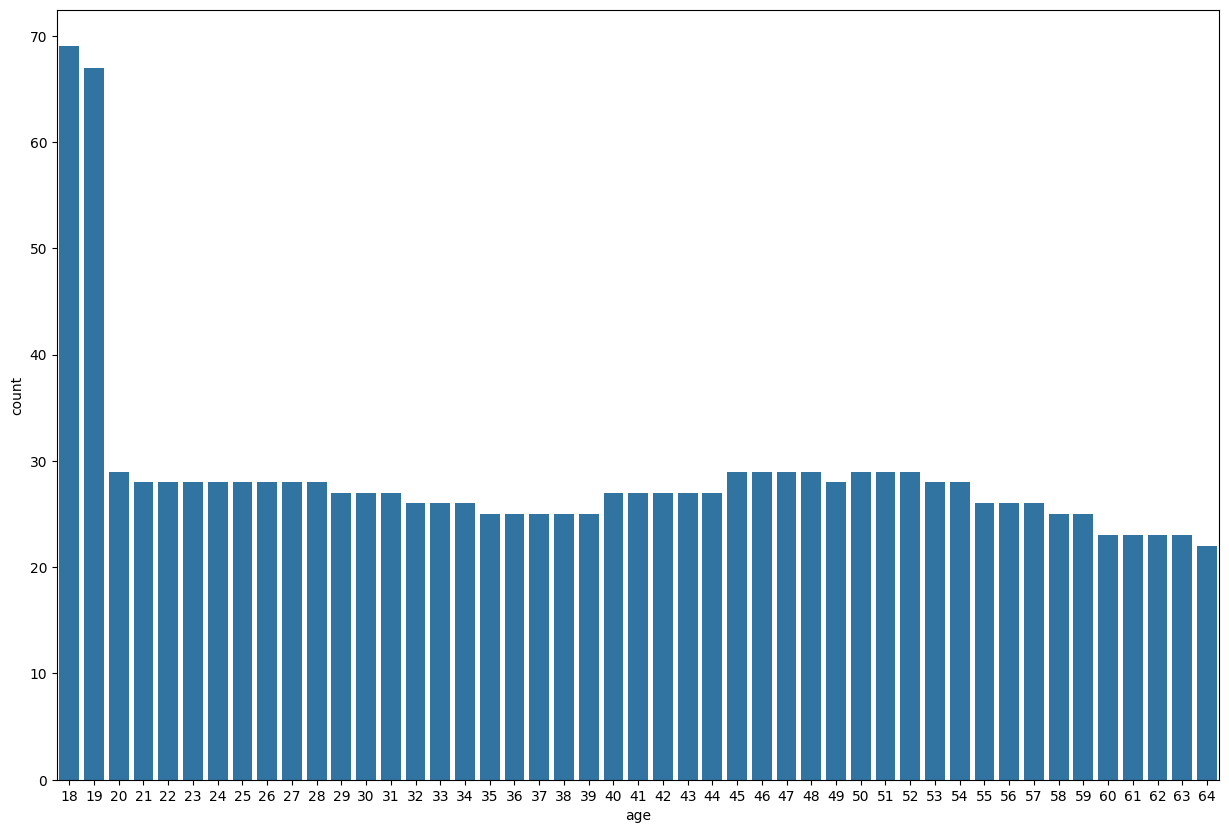

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='age')
plt.show()

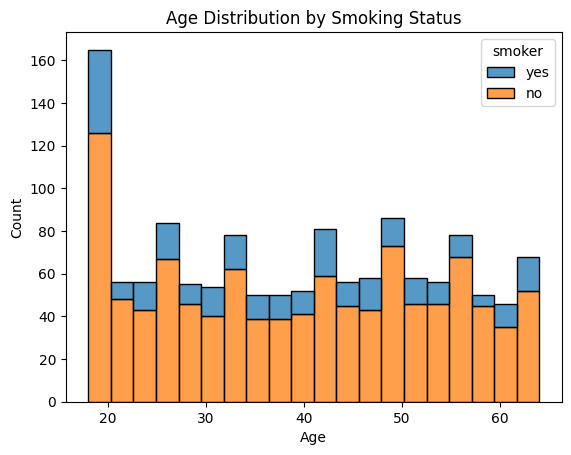

In [46]:
sns.histplot(x='age',bins=20,data=df,hue='smoker',multiple='stack')
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Charge Vs BMI')

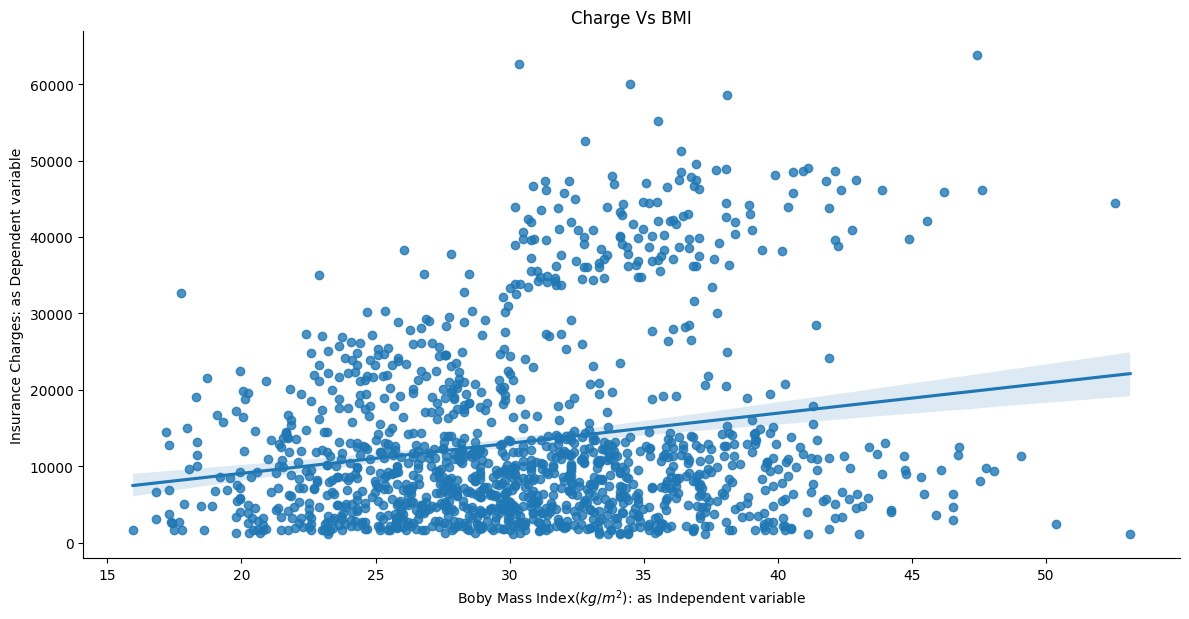

In [47]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')


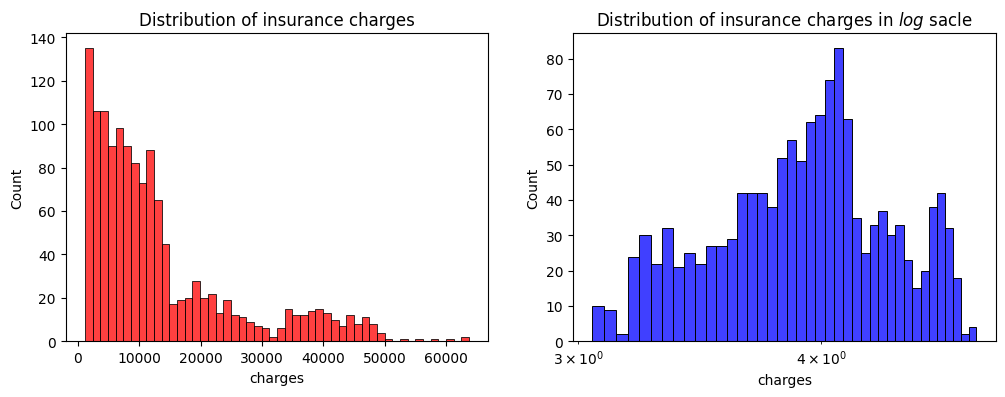

In [48]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

Text(0.5, 1.0, 'SMOKERS')

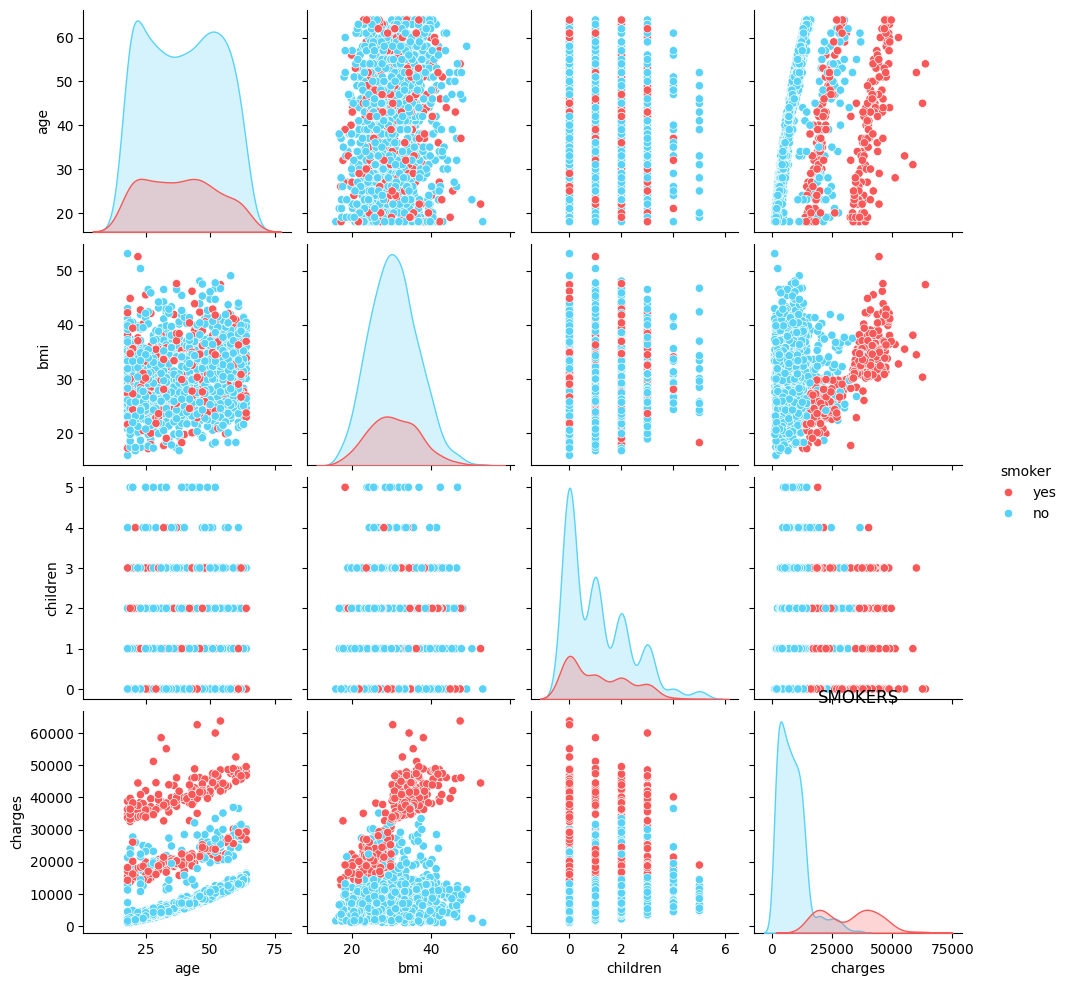

In [49]:
sns.pairplot(df,hue='smoker',palette=["#FA5858", "#58D3F7"])
plt.title('SMOKERS')

C:\Users\Saqlain\AppData\Local\Temp\ipykernel_22280\777869649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='charges',y='smoker',data=df,orient='h',palette='magma')


<Axes: xlabel='charges', ylabel='smoker'>

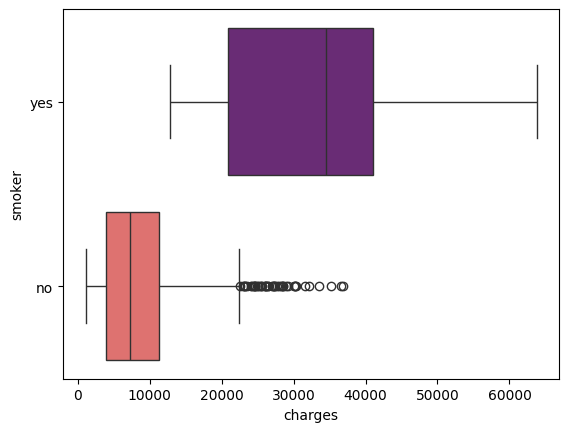

In [52]:
sns.boxplot(x='charges',y='smoker',data=df,orient='h',palette='magma')

column transformer pipeline

In [79]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [80]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [81]:
X,y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1332   50    male  30.970         3     no  northwest
 1333   18  female  31.920         0     no  northeast
 1334   18  female  36.850         0     no  southeast
 1335   21  female  25.800         0     no  southwest
 1336   61  female  29.070         0    yes  northwest
 
 [1337 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1332    10600.54830
 1333     2205.98080
 1334     1629.83350
 1335     2007.94500
 1336    29141.36030
 Name: charges, Length: 1337, dtype: float64)

In [90]:
# creating column transformer

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [83]:
cat_data = X.select_dtypes(include=['object','category']).columns
num_data = X.select_dtypes(include=['int64','float64']).columns

In [84]:
num_transformer = StandardScaler()
cat_transformer = LabelEncoder()
for cat in cat_data:
  X[cat] = cat_transformer.fit_transform(X[cat])

preprocessor = ColumnTransformer(
  [
    ('StandardScaler',num_transformer,num_data),
  ],
  remainder='passthrough' #important
)

X = preprocessor.fit_transform(X)

In [85]:
X

array([[-1.44041773, -0.45315959, -0.90923416,  0.        ,  1.        ,
         3.        ],
       [-1.51164747,  0.50942165, -0.07944162,  1.        ,  0.        ,
         2.        ],
       [-0.79935006,  0.3831546 ,  1.58014347,  1.        ,  0.        ,
         2.        ],
       ...,
       [-1.51164747,  1.01448983, -0.90923416,  0.        ,  0.        ,
         2.        ],
       [-1.29795825, -0.79752426, -0.90923416,  0.        ,  0.        ,
         3.        ],
       [ 1.55123139, -0.26129928, -0.90923416,  0.        ,  1.        ,
         1.        ]])

In [86]:
X.shape

(1337, 6)

In [88]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [89]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1069, 6), (268, 6))

In [93]:
# create an evaluation fuction to give all metrics
def evaluate_model(true,predicted):
  mse = mean_squared_error(true,predicted)
  mae = mean_absolute_error(true,predicted)
  rmse = np.sqrt(mse)
  r2_sc = r2_score(true,predicted)
  return mae,rmse,r2_sc


In [94]:
models = {
  'Linear Regression' : LinearRegression()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)  #train the model

  #maling predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #evaluate test and train dataset
  model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
  model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')
    


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6083.2172
- Mean Absolute Error: 4181.3216
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.6088
- Mean Absolute Error: 4182.3532
- R2 Score: 0.8068




In [97]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model-name','r2_score']).sort_values(by=["r2_score"],ascending=False)

,model-name,r2_score
0,Linear Regression,0.806847


In [99]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 80.68


Text(0, 0.5, 'predicted')

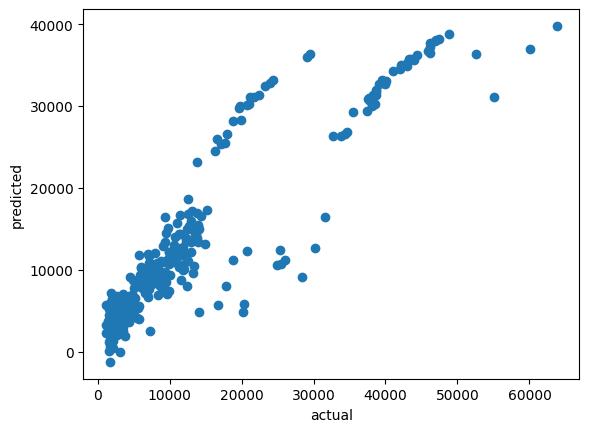

In [100]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='charges'>

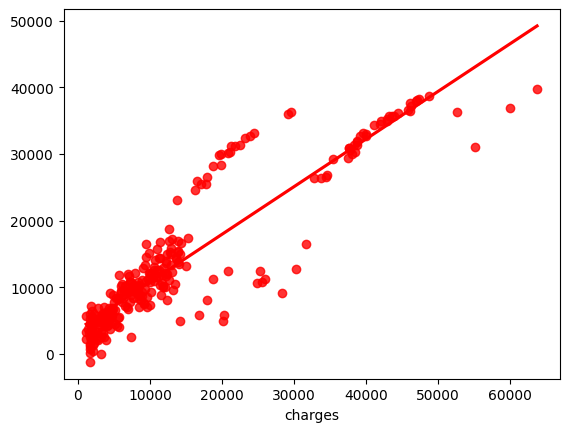

In [101]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')